In [1]:
# Imports

In [2]:
from deepchecks.base import Dataset
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from deepchecks.checks.performance import RocReport
import pandas as pd

In [3]:
# Generating data:

In [4]:
iris = load_iris(as_frame=True)
clf = LogisticRegression(max_iter=1)
frame = iris.frame
X = iris.data
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=55)
clf.fit(X_train, y_train)
ds = Dataset(pd.concat([X_test, y_test], axis=1), 
            features=iris.feature_names,
            label='target')

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


In [5]:
# Running roc_report check:

In [6]:
check = RocReport()

ROC Report

Return the AUC for each class.

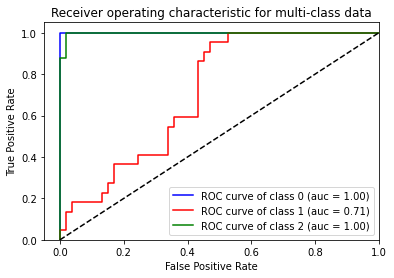

In [7]:
check.run(ds, clf)